In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import wiener
from skimage import color,data,restoration
from scipy.signal import convolve2d
%matplotlib inline

In [2]:
def ListofFiles(path):
    filelist=[]
    for root, dirs, files in os.walk(path):
        for file in files:
             filelist.append(os.path.join(root,file))
    return filelist
def getImageValues(Files,EventLimit=1):
    if(type(Files) is list):
        values={}
        count=0
        for file in Files:
            img1=Image.open(file)
            imgArray=np.array(img1)
            values[count]=imgArray
            count+=1
            if(EventLimit==count):
                break
        print(f" {count} frames in dictinary ")
    else:
        img1=Image.open(Files)
        values=np.array(img1)
    return values

def AverageIt(data):
    count=0
    Total=0
    for i in range (0,len(data)):
        Total+=data[i]  
        count+=1
    Averaged=Total/count
    values=0
    for i in range (0,len(data)):
        values+=(data[i]-Averaged)**2
        
    stdev=np.sqrt(values/(count-1))    
    print(f"Total Events Averaged is {count}")
    
    return Averaged,stdev

def PlotSideBySide(EL,Background):
    fig, axs = plt.subplots(1, 2,figsize=(15,12))
    BkSubstracted=EL-Background[0]
    axs[0].set_title("BackGround Substracted")
    axs[0].imshow(BkSubstracted,cmap='gray')
    axs[1].set_title("With Background")
    axs[1].imshow(EL,cmap='gray')

    plt.show()

def Plot(EL):
    plt.figure(figsize=(15,12))
    plt.title("Tracks")
    plt.imshow(EL)

    plt.show()

def PlotSideBySideWiner(EL,noise=(10,10)):
    fig, axs = plt.subplots(1, 2,figsize=(15,12))
    axs[0].set_title("Actual")
    axs[0].imshow(EL,)
    axs[1].set_title("Winer Filtered")
    WinerFiltered=wiener(EL,noise)
    axs[1].imshow(WinerFiltered)

    plt.show()


In [3]:
NoEl=ListofFiles("/media/ilker/Ilker/CRAB/Camera Tracks/07.22.22/10kVgap_Pb210/EL-NoEL/NoEl")
Day1El=ListofFiles("/media/ilker/Ilker/CRAB/Camera Tracks/07.22.22/10kVgap_Pb210/EL-NoEL/EL")
Day2El=ListofFiles("/media/ilker/Ilker/CRAB/Camera Tracks/07.23.22/10kV EL")

In [12]:
Event=-1
BackGround=getImageValues(NoEl,EventLimit=Event)
ELDay1Images=getImageValues(Day1El,EventLimit=-1)
ELDay2Images=getImageValues(Day2El,EventLimit=-1)



 1500 frames in dictinary 
 1500 frames in dictinary 
 1500 frames in dictinary 


In [13]:
AveragedBackground=AverageIt(BackGround)

Total Events Averaged is 1500


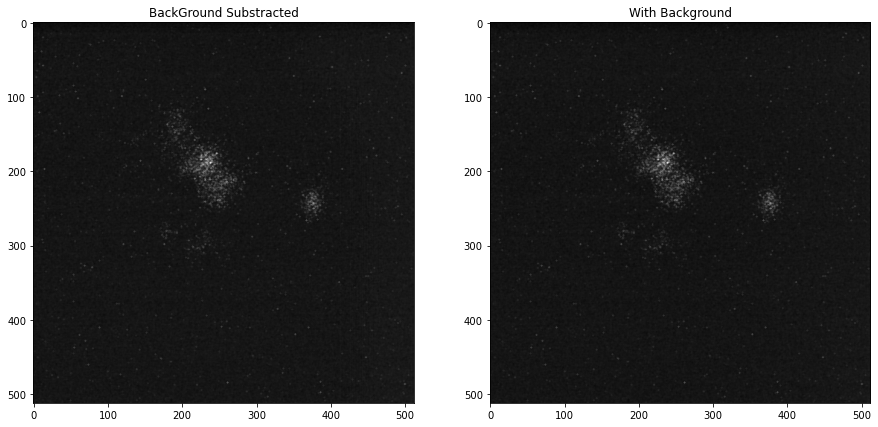

In [18]:
PlotSideBySide(ELDay1Images[1300],AveragedBackground)

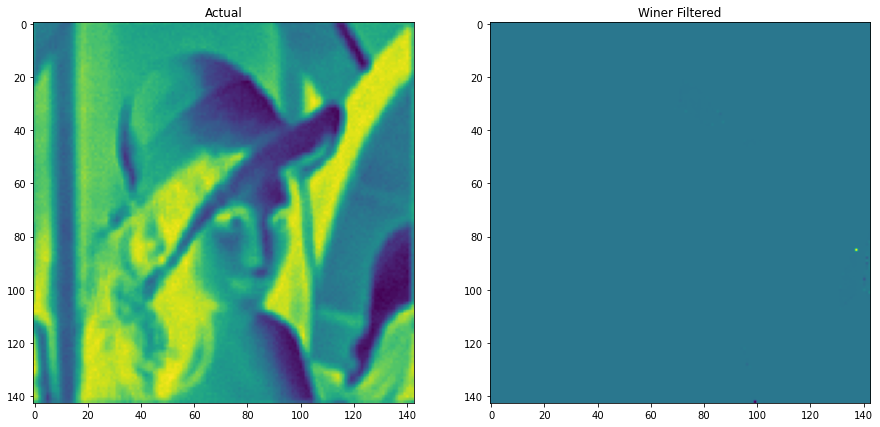

In [7]:
img=getImageValues("/home/ilker/Desktop/wienblur.gif")
PlotSideBySideWiner(img)

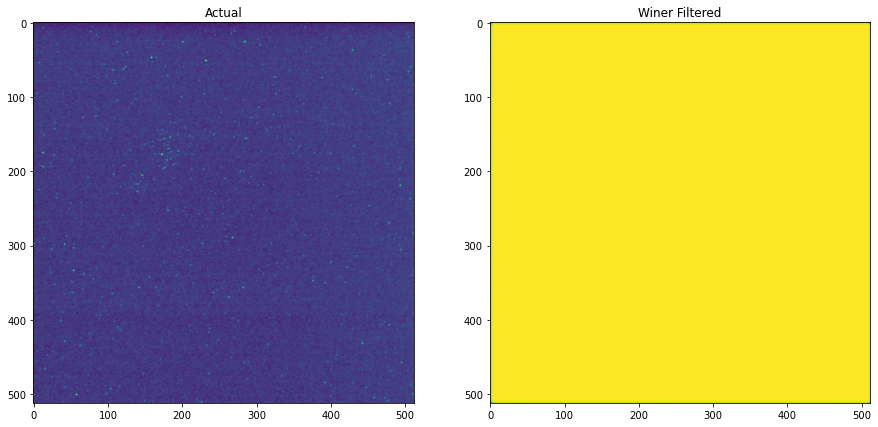

In [8]:
PlotSideBySideWiner(ELDay1Images[1100])

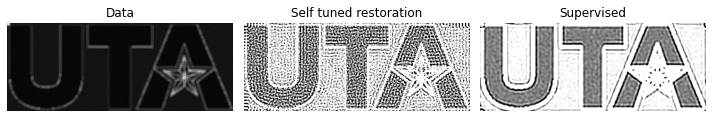

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
[[32 30 28 ... 41 41 37]
 [29 27 26 ... 45 43 38]
 [31 26 27 ... 53 50 45]
 ...
 [56 53 41 ... 59 55 57]
 [52 50 39 ... 52 51 51]
 [44 42 35 ... 45 44 41]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage import color, data, restoration
test="/media/ilker/Ilker/CRAB/Camera Tracks/07.22.22/10kVgap_Pb210/EL-NoEL/EL/1/10kV, Pb210, Locked II0_00033.tif"

astro=getImageValues("/home/ilker/Desktop/download.png")
rng = np.random.default_rng()

from scipy.signal import convolve2d as conv2
psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
astro += 0.1 * astro.std() * rng.standard_normal(astro.shape)

deconvolved, _ = restoration.unsupervised_wiener(astro, psf)
deconvolved_img = restoration.wiener(astro, psf, 0.1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0].imshow(astro)
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

ax[2].imshow(deconvolved_img,cmap='gray')
ax[2].axis('off')
ax[2].set_title('Supervised')

fig.tight_layout()

plt.show()
print(psf)
print(img)

In [10]:
test=getImageValues("/media/ilker/Ilker/CRAB/Camera Tracks/07.22.22/10kVgap_Pb210/EL-NoEL/EL/1/10kV, Pb210, Locked II0_00033.tif")
